Looking at the magnitude spectrums of the Gaussian and it's derivatives, we can see the different signal filtering each will perform.

In [1]:
#Original source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

import numpy as np
import cv2
from matplotlib import pyplot as plt
#plt.rcParams["figure.figsize"] = (100,100)

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# sobel in x direction (approximation of first-order derivative of Gaussian)
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction (approximation of first-order derivative of Gaussian)
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian (approximation of second-order derivative of Gaussian)
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, laplacian, sobel_x, sobel_y]
filter_name = ['gaussian', 'laplacian', 'sobel_x','sobel_y']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(cv2.resize(mag_spectrum[i], dsize=(32,32)),cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

<Figure size 640x480 with 4 Axes>

So let's look at a simple examples of how the Sobel and Laplacian operator works.

In [2]:
#Note: Matplotlib will normalize the output, i.e X' = (X - X_min) / (X_max - X_min) to get the values between 0-1
def show_grads(H,Hx,Hy,Hxy):
    plt.subplot(2,2,1),plt.imshow(H,cmap = 'gray')
    plt.title('H'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(Hx,cmap = 'gray')
    plt.title('Hx'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,3),plt.imshow(Hy,cmap = 'gray')
    plt.title('Hy'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,4),plt.imshow(Hxy,cmap = 'gray')
    plt.title('Hxy'), plt.xticks([]), plt.yticks([])
    plt.show()




What happens with 

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
[[ 0. -4.  0.  4.  0.  0.]
 [ 0. -4.  0.  4.  0.  0.]
 [ 0. -4.  0.  4.  0.  0.]
 [ 0. -4.  0.  4.  0.  0.]
 [ 0. -4.  0.  4.  0.  0.]]
[[ 0.  1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]]


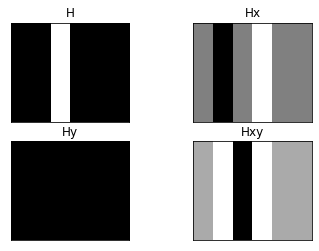

In [3]:
H = np.zeros((5,6))
H[:,2:3] = 1 #Have a 1px edge.  

Hx = cv2.filter2D(H, -1, np.flipud(np.fliplr(sobel_x))) 
Hy = cv2.filter2D(H, -1, np.flipud(np.fliplr(sobel_y))) 
Hxy = cv2.filter2D(H, -1, np.flipud(np.fliplr(laplacian))) 

print(H)
print(Hx)
print(Hxy)
show_grads(H,Hx,Hy,Hxy)

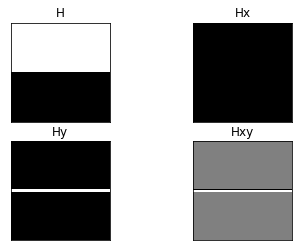

In [4]:
H = np.zeros((50,50))
H[:25, :] = 128


Hx = cv2.filter2D(H, -1, np.flipud(np.fliplr(sobel_x))) 
Hy = cv2.filter2D(H, -1, np.flipud(np.fliplr(sobel_y))) 
Hxy = cv2.filter2D(H, -1, np.flipud(np.fliplr(laplacian))) 


show_grads(H,Hx,Hy,Hxy)


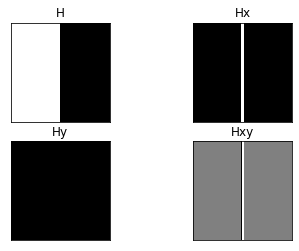

In [5]:
H = np.zeros((50,50))
H[:, :25] = 255


Hx = cv2.filter2D(H, -1, np.flipud(np.fliplr(sobel_x))) 
Hy = cv2.filter2D(H, -1, np.flipud(np.fliplr(sobel_y))) 
Hxy = cv2.filter2D(H, -1, np.flipud(np.fliplr(laplacian))) 


show_grads(H,Hx,Hy,Hxy)